In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# csv 형식으로 된 데이터 파일을 읽어옵니다.
train = pd.read_csv('./data/train.csv')

train

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [15]:
# 결측치 확인
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

check_missing_col(train)

결측치가 존재하지 않습니다


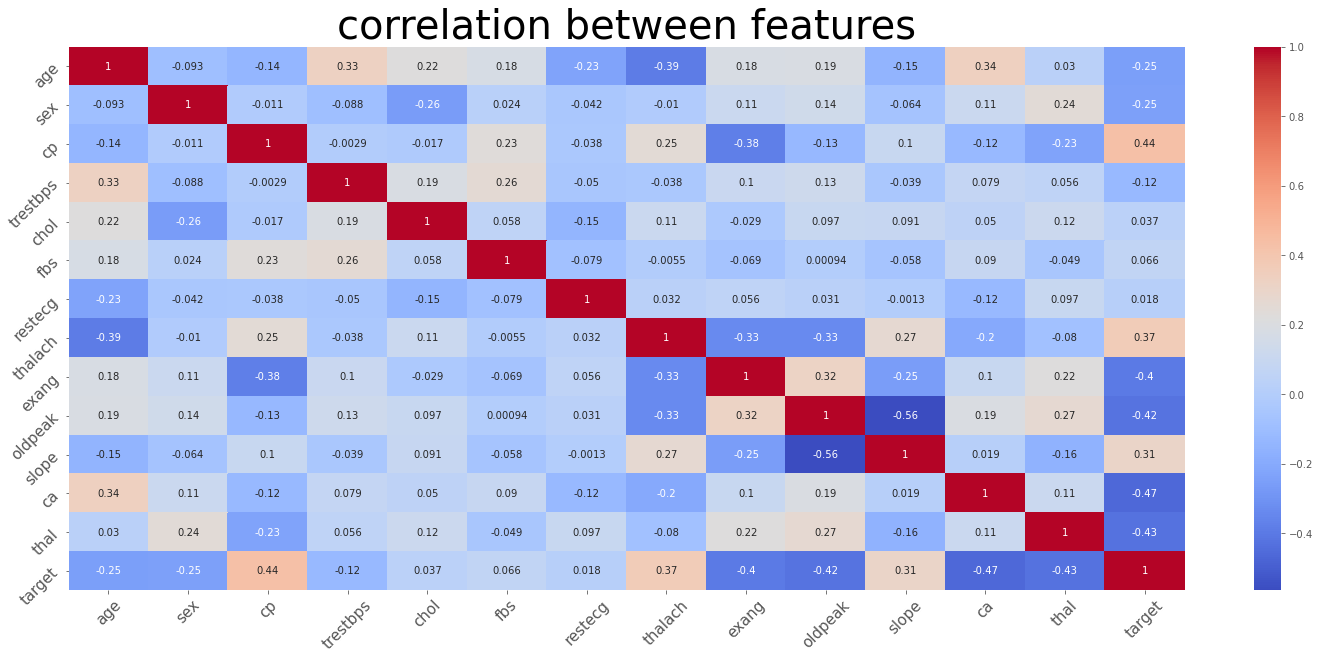

In [16]:
# 상관계수 분석 & 시각화 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(25,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True,cmap='coolwarm')

heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15, rotation=45)

plt.title('correlation between features', fontsize=40)
plt.show()

In [17]:
# 단계적 회귀 
# target과 다른 feature들의 상관계수는 아래와 같습니다.
corr_score = abs(heat_table.target[:-1])

# 상관계수 절대값을 기준으로 내림차순으로 정렬합니다.
corr_score.sort_values()

restecg     0.017528
chol        0.036991
fbs         0.065821
trestbps    0.122850
sex         0.246289
age         0.247806
slope       0.305994
thalach     0.365249
exang       0.396145
oldpeak     0.421514
thal        0.428530
cp          0.436273
ca          0.466289
Name: target, dtype: float64

In [18]:
# 성능 변화 평가를 위해 data 나누기
X = train.iloc[:, 1:-1] 
Y = train.iloc[:, -1] 

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.5, shuffle=True, random_state=34)

In [19]:
# 성능 출력 함수
from sklearn.metrics import f1_score

def print_score(predicted, y):
    accuracy = sum(predicted == y) / len(y)*100
    f1 = f1_score(y, predicted)*100
    print(f'accuracy: {accuracy:.2f}%') # 정확도 출력
    print(f'f1_score : {f1:.2f}%') # f1 score 출력
    return accuracy, f1


check_acc = []
check_f1 = []

In [20]:
# 1단계 :  feature 삭제 없이 검증
from sklearn.linear_model import LogisticRegression
#1단계 train 데이터 준비
step_1_train_x = x_train.copy()

#1단계 train
LR_step_1_model = LogisticRegression()
LR_step_1_model.fit(step_1_train_x, y_train)
#1단계 validation 데이터 준비
step_1_val_x = x_val.copy()

#1단계 validaion
LR_step_1_preds = LR_step_1_model.predict(step_1_val_x)
acc, f1 = print_score(LR_step_1_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 80.26%
f1_score : 83.87%


In [21]:
# 2단계 : ["restecg"] feature 삭제

#2단계 train 데이터 준비
step_2_train_x = x_train.drop("restecg",axis=1)

#2단계 train
LR_step_2_model= LogisticRegression()
LR_step_2_model.fit(step_2_train_x, y_train)

#2단계 validation 데이터 준비
step_2_val_x = x_val.drop("restecg", axis=1)

#2단계 validation
LR_step_2_preds = LR_step_2_model.predict(step_2_val_x)
acc, f1 = print_score(LR_step_2_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 81.58%
f1_score : 85.11%


In [22]:
# 3단계 : ["restecg", "thalach"] feature 삭제

#3단계 train 데이터 준비
step_3_train_x = x_train.drop(["restecg","chol"],axis=1)

#3단계 train 
LR_step_3_model= LogisticRegression()
LR_step_3_model.fit(step_3_train_x, y_train)

#3단계 validation 데이터 준비
step_3_val_x = x_val.drop(["restecg","chol"],axis=1)

#3단계 validation
LR_step_3_preds = LR_step_3_model.predict(step_3_val_x)
acc, f1 = print_score(LR_step_3_preds, y_val)

check_acc.append(acc)
check_f1.append(f1) 

accuracy: 80.26%
f1_score : 84.21%


In [23]:
# 4단계 : ["restecg", "chol", "fbs"] feature 삭제

#4단계 train 데이터 준비
step_4_train_x = x_train.drop(["restecg","chol","fbs"],axis=1)

#4단계 train
LR_step_4_model= LogisticRegression()
LR_step_4_model.fit(step_4_train_x,y_train)

#4단계 validaion 데이터 준비
step_4_val_x = x_val.drop(["restecg","chol","fbs"],axis=1)

#4단계 validation
LR_step_4_preds = LR_step_4_model.predict(step_4_val_x)
acc, f1 = print_score(LR_step_4_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 81.58%
f1_score : 85.11%


In [24]:
# 5단계 : ["restcg", "chol", "fbs", "trestbps"] feature 삭제

#5단계 trian 데이터 준비
step_5_train_x = x_train.drop(["restecg","chol","fbs","trestbps"],axis=1)

#5단계 train
LR_step_5_model= LogisticRegression()
LR_step_5_model.fit(step_5_train_x,y_train)

#5단계 validation 데이터 준비
step_5_val_x = x_val.drop(["restecg","chol","fbs","trestbps"],axis=1)

#5단계 validation
LR_step_5_preds = LR_step_5_model.predict(step_5_val_x)
acc, f1 = print_score(LR_step_5_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 82.89%
f1_score : 85.71%


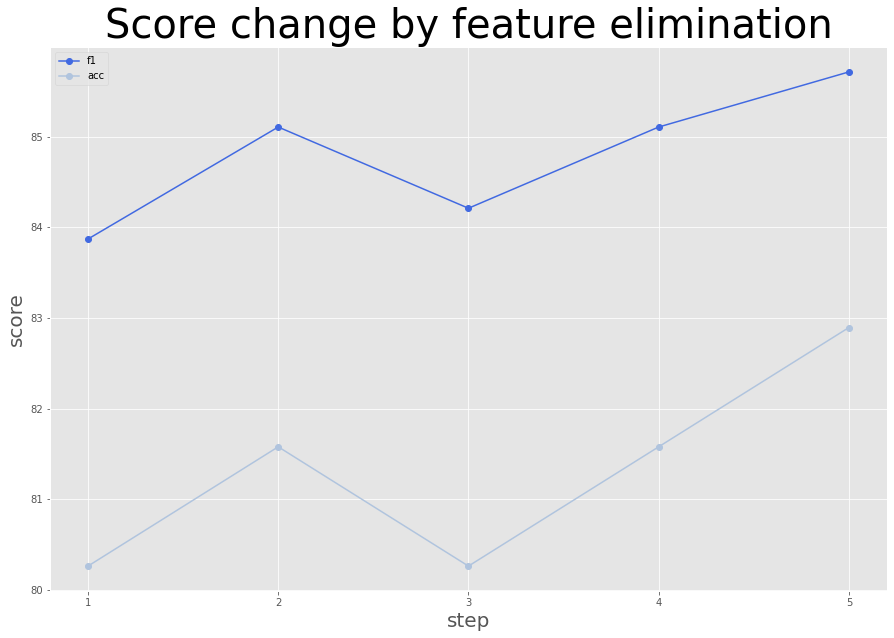

In [25]:
#5개의 모델들의 성능 비교해보기
step = [1,2,3,4,5]

#plt.bar(step,acc,label="acc")
plt.figure(figsize=(15,10))
plt.plot(step, check_f1, 'bo-', label="f1", color = 'royalblue')
plt.plot(step, check_acc, 'bo-', label='acc', color='lightsteelblue')

plt.title("Score change by feature elimination", size=40)
plt.xlabel("step", size=20)
plt.ylabel("score", size=20)
plt.xticks(step)
plt.legend()
plt.show()

In [26]:
# best model train

best_model_train_x = X.drop(["restecg","chol","fbs","trestbps"],axis=1)

best_model = LogisticRegression()
best_model.fit(best_model_train_x,Y)

LogisticRegression()

In [27]:
# 예측 값 생성 및 제출하기

#test data 준비
test = pd.read_csv("data/test.csv")

best_model_test = test.drop(["id","restecg","chol","fbs","trestbps"],axis=1)

# 값을 예측합니다.
prediction = best_model.predict(best_model_test)

In [28]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('data/sample_submission.csv')
submission['target'] = prediction
submission

,id,target
0,1,0
1,2,1
2,3,1
3,4,0
4,5,1
...,...,...
147,148,0
148,149,0
149,150,0
150,151,1


In [29]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv", index=False)